
# Project Overview
This project explores Loss Convergence and Minimization. It is a modified version of original Harvard code, enhanced with additional comments and code implementations.

Key Learning Objectives:
1.  Calculation of Loss (Mean Squared Error)
2.  Backpropagation
3.  Gradient Descent
4.  Class object implementation and instance creation
5.  Linear Regression Machine Model
6.  Python formatting best practices
7.  Understanding algorithms
8.  Implementation of Matplotlib and NumPy
9.  TensorFlow basics
10. `tf.GradientTape()` functionality

In [ ]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':#splits tf version into strings return first element,if not equal to 2 raise an exception
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:#allows to interact with python interpreter and return current p version
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))
print(sys.version_info)#current python version
print(tf.__version__)


sys.version_info(major=3, minor=12, micro=12, releaselevel='final', serial=0)
2.19.0


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [ ]:
# Define initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

'''
Define our loss function
Take the squared error to find out how much loss is incurred.
Find average loss for all entries
'''

def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))


'''
class is a blueprint for creating objects
class creates an empty object in memory
__init__ is a constructor in python
self points to the empty object
init adds attributes to the object
tf.variable is mutable and allows weight updation during training
it also enables tracking of gradients
__call__ allows calling class as a function
the call returns models predictions

'''
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

'''
Training procedure
with tf.GradientTape() creates a tape object that records tensorflow operations and stores them
recording means tracking models predictions and calculating loss
this enables t.gradient to autamatically calculate automatic differentiation using the stored values in t
gradient ,partial derivatives of loss with respect to weights and bias respectively
values are stores in dw,db derivative of weight and bias respectively
model.w accesses the specific tf variable in the model's object
model.w.assign_sub(learning_rate * dw) updates the value of the variable
similarly for model.b.asssign_sub(learning_rate * db)
assign_sub is an in-place subtraction operation for TensorFlow variables.
It subtracts (learning_rate * gradient) from the current parameter value
and stores new value in the variable(backpropagation)
learning_rate controls how big a step you take in the direction indicated by the gradient.

Parameters
model-models object created before
inputs-data to predict output
outputs-labels
learning rate-step size

'''

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)#call loss function
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen

    #Backpropagation and Gradient Descent
    model.w.assign_sub(learning_rate * dw) #model.w assign_sub(-=)
    model.b.assign_sub(learning_rate * db)
    return current_loss #to track progress


### Train our model

In [ ]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]

LEARNING_RATE=0.09

# Instantiate our model
model = Model()


# Collect the history of w-values and b-values to plot later
list_w = []
list_b = []
epochs = range(50)#number of time model will see data
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())# stores current weights at the beggining of every epoch
  list_b.append(model.b.numpy())#conversion to numpy array so as to easily plot and move from tf variables
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  '''
  formatting
  2d refers that minimum width character is 2 and incase its one character should be padded with a decimal place
  since appending happens directly after each operation to find current weights at the begginning of each epoch ,we get last items -1
  1.2f: minumim character width of 1 and 2 decimal places
  2.5f:minimum character width of 2 and 5 decimal places
  '''
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-0.41 b=5.86, loss=27.47032
Epoch  2: w=-0.02 b=5.28, loss=22.43888
Epoch  3: w=0.16 b=4.69, loss=18.46284
Epoch  4: w=0.33 b=4.16, loss=15.19137
Epoch  5: w=0.49 b=3.68, loss=12.49958
Epoch  6: w=0.63 b=3.25, loss=10.28476
Epoch  7: w=0.76 b=2.85, loss=8.46238
Epoch  8: w=0.87 b=2.50, loss=6.96291
Epoch  9: w=0.98 b=2.17, loss=5.72914
Epoch 10: w=1.07 b=1.88, loss=4.71398
Epoch 11: w=1.16 b=1.61, loss=3.87870
Epoch 12: w=1.24 b=1.37, loss=3.19143
Epoch 13: w=1.31 b=1.15, loss=2.62593
Epoch 14: w=1.37 b=0.95, loss=2.16064
Epoch 15: w=1.43 b=0.77, loss=1.77779
Epoch 16: w=1.48 b=0.60, loss=1.46278
Epoch 17: w=1.53 b=0.45, loss=1.20359
Epoch 18: w=1.57 b=0.32, loss=0.99032
Epoch 19: w=1.61 b=0.20, loss=0.81484
Epoch 20: w=1.65 b=0.08, loss=0.67046
Epoch 21: w=1.68 b=-0.02, loss=0.55166
Epoch 22: w=1.71 b=-0.11, loss=0.45391
Epoch 23: w=1.74 b=-0.19, loss=0.37348
Epoch 24: w=1.76 b=-0.27, loss=0.30730
Epoch 25: w=1.79 b=-0.33, loss=0.2

### Plot our trained values over time

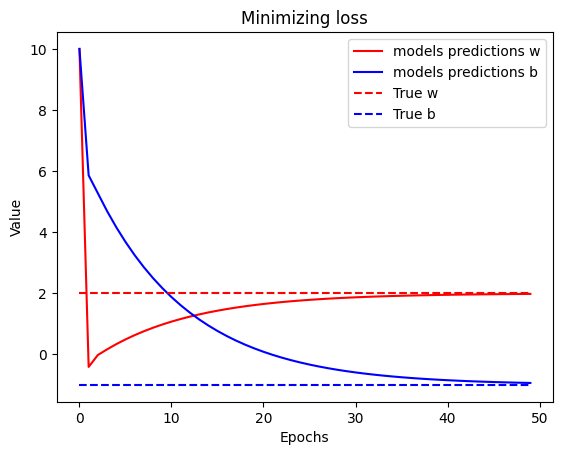

In [ ]:
# Plot the w-values and b-values for each training Epoch against the true values

'''
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')- plots 2 plots with epochs and lists as (x,y) respectively. The thrid argument is the color of the plotting line
plt.plot([TRUE_w] * len(epochs), 'r--',TRUE_b] * len(epochs), 'b--') - plots two dashed lines
list multiplied by interger creates a list with the item repated as many times as the interger value
Eg [TRUE_w] * len(epochs) results in [2.0 repeated 50 times], this results in y value
The plot assumes epochs as the x value and stores the list interger product as y values
third argument specifies the nature and colour of line(eg dashed and red)
plt.legend(['w', 'b', 'True w', 'True b']) - adds a legend to the plot
plt.show() - displays the plot
'''
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['models predictions w', 'models predictions b', 'True w', 'True b'])
plt.title('Minimizing loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.show()

CONCLUSION


This plot shows that as the number of epochs increase was the models ability to make better weight adjustments. Convegence occurs towards the peripheral. This is the point where loss with respect to the weight is at its minimum.